# IT8302 Applied Machine Learning - CA1 Submission
- Submitted by: Lo Ka Fai
- Student ID: 7304896V
- Submission date: 1 Dec 2024

# Part A: Classification - Titanic Dataset - Predicting survivors

### Kaggle dataset link: https://www.kaggle.com/c/titanic/data

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


# 2. Dataset Import and Exploratory Data Analysis

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Note: Missing values in Age, Cabin and Embarked column in train dataset

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Note: Missing values in Age and Cabin column in test dataset

In [9]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
test["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [11]:
train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [12]:
test["Cabin"].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [13]:
train["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
train["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Note: Fare column has outliers

In [16]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Note: Fare column has outliers

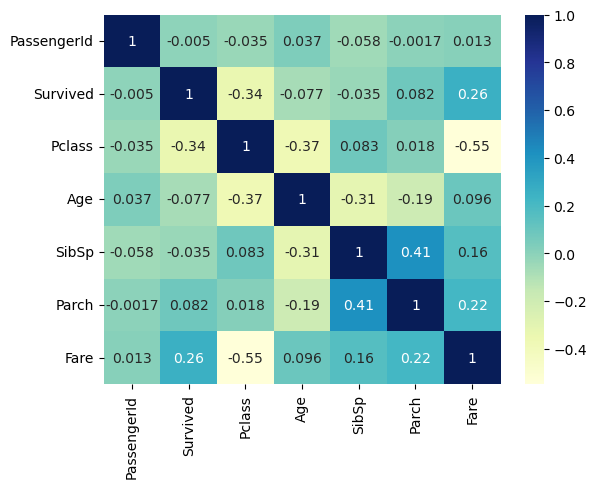

In [17]:
sns.heatmap(train.select_dtypes(include=[np.number]).corr(), annot=True, cmap="YlGnBu")
plt.show()

### Note: Overall, feature variables have no strong correlation with target (Survived) label. SibSp and Parch are relatively highly correlated.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

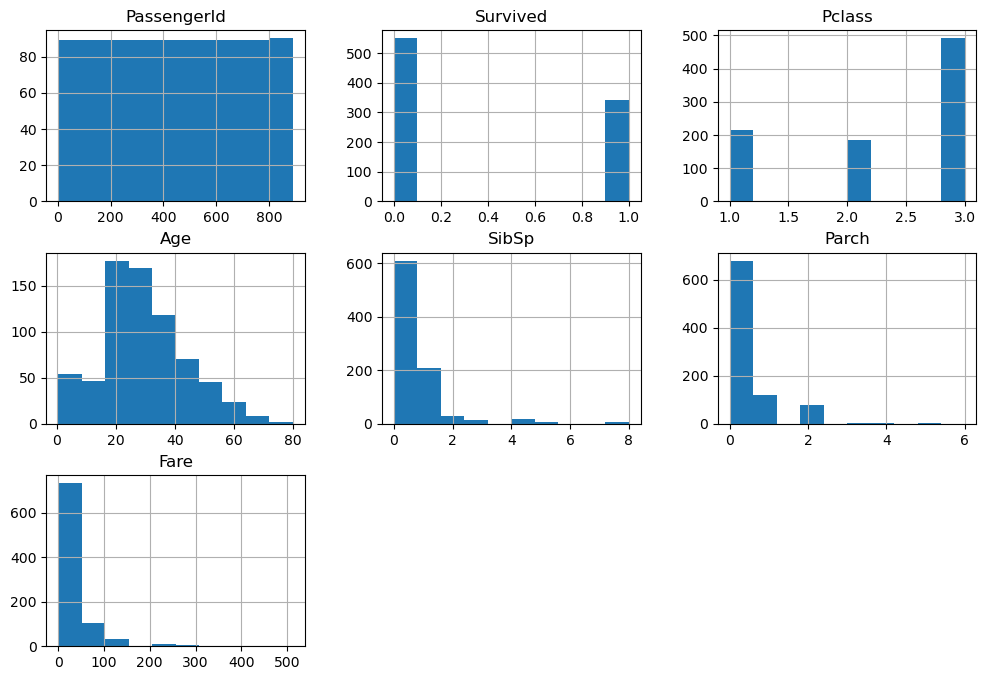

In [18]:
train.hist(figsize=(12,8))

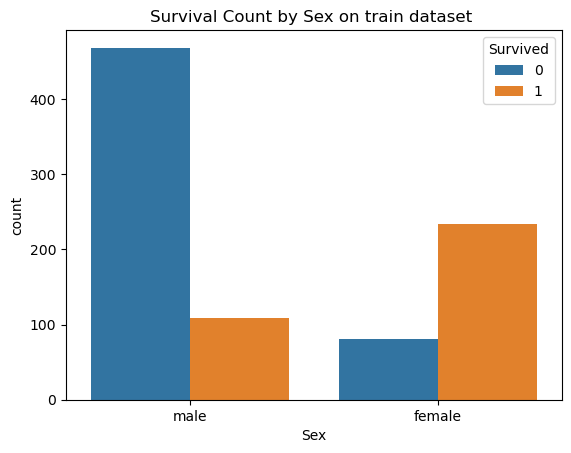

In [19]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival Count by Sex on train dataset ")
plt.show()

In [20]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Note: Females had higher survival rate than Males

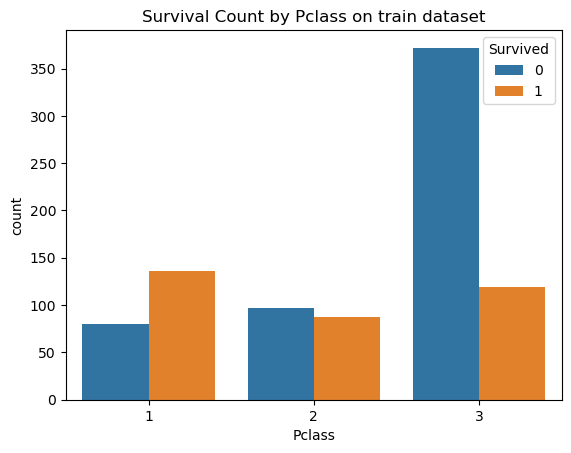

In [21]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival Count by Pclass on train dataset")
plt.show()

In [22]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Note: Passengers in 1st Class had a better surviving chance.

# 3. Data Preperation 

### 3.1 Data Cleaning - Data manipulation and missing values handling

In [24]:
# First remove PassengerId, Name and Ticket column from train and test dataset, assuming their correlation relationship with Target variable is insignificant.
train1 = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test1 = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [25]:
train1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [26]:
test1.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q


In [27]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [28]:
train1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 3.2 Missing data in Age column (Apply data imputation method)

In [29]:
# Replace missing values in "Age" with Age's mean value in train dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the "Age" column
train1['Age'] = imputer.fit_transform(train1[['Age']])

train1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
train1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [31]:
test1.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [32]:
# Replace missing values in "Age" with Age's mean value in test dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the "Age" column
test1['Age'] = imputer.fit_transform(test1[['Age']])

test1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,12.634534,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
test1.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### 3.3 Missing data in Cabin column

In [34]:
# Replace NaN with 1 and Non-NaN with 0
train1['Cabin'] = train1['Cabin'].isna().astype(int)
test1['Cabin'] = test1['Cabin'].isna().astype(int)

In [35]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [36]:
train1["Cabin"].value_counts()

Cabin
1    687
0    204
Name: count, dtype: int64

In [37]:
train1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [38]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     418 non-null    int32  
 7   Embarked  418 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 24.6+ KB


In [39]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

### 3.4 Missing data in Fare column (only in test dataset, imputation method)

In [40]:
# Replace missing values in "Fare" with Fare's mean value in test dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the "Age" column
test1['Fare'] = imputer.fit_transform(test1[['Fare']])

test1.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.782297
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.413179
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [41]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int32  
 7   Embarked  418 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 24.6+ KB


In [42]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 3.5 Missing value in Embarked column (only in train dataset, by imputation method)

In [43]:
# Replace missing values in "Embarked" with Embarked's Mode value in train dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the "Embarked" column
#train1['Embarked'] = imputer.fit_transform(train1[['Embarked']])

train1['Embarked'] = imputer.fit_transform(train1[['Embarked']]).ravel()


In [46]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [47]:
train1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 3.6 One-Hot Encoding to all categorical variables

In [48]:
# List of all categorical columns
cat_cols = ['Sex', 'Embarked']

# Use pd.get_dummies to one-hot encode categorical columns
train1_encoded = pd.get_dummies(train1, columns=cat_cols)
test1_encoded = pd.get_dummies(test1, columns=cat_cols)

# Convert only the categorical columns to int, leave other columns unchanged
train2 = train1_encoded.astype({'Sex_female': 'int', 'Sex_male': 'int', 'Embarked_C': 'int', 'Embarked_Q': 'int', 'Embarked_S': 'int'})
test2 = test1_encoded.astype({'Sex_female': 'int', 'Sex_male': 'int', 'Embarked_C': 'int', 'Embarked_Q': 'int', 'Embarked_S': 'int'})

train2.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1


In [49]:
test2.head(3)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0,1,0


In [50]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    int32  
 7   Sex_female  891 non-null    int32  
 8   Sex_male    891 non-null    int32  
 9   Embarked_C  891 non-null    int32  
 10  Embarked_Q  891 non-null    int32  
 11  Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(6), int64(4)
memory usage: 62.8 KB


In [51]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Cabin       418 non-null    int32  
 6   Sex_female  418 non-null    int32  
 7   Sex_male    418 non-null    int32  
 8   Embarked_C  418 non-null    int32  
 9   Embarked_Q  418 non-null    int32  
 10  Embarked_S  418 non-null    int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 26.3 KB


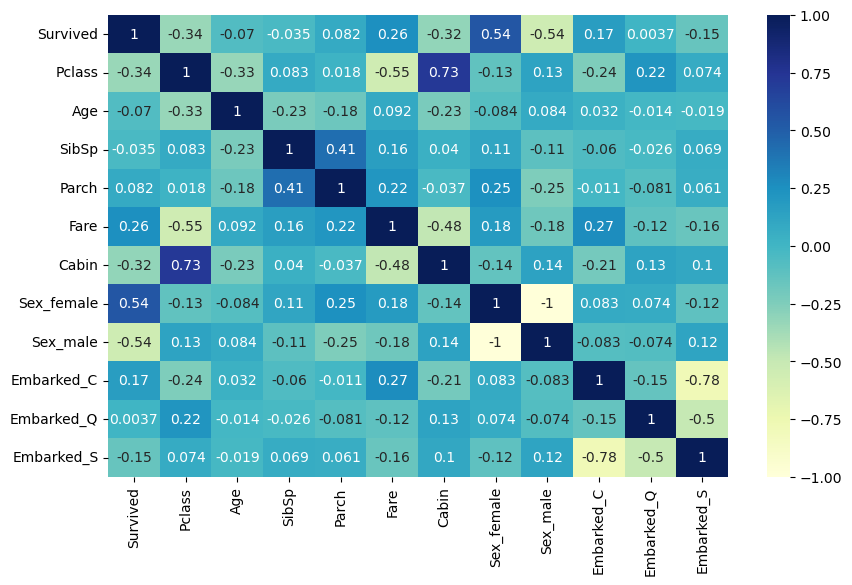

In [52]:
# Plot the heatmap for the correlation relationship

plt.figure(figsize=(10, 6)) 
sns.heatmap(train2.corr(), annot=True, cmap="YlGnBu")
plt.show()

### <Note: train2 and test2 data are clean now and ready for ML model training >

# 4. Model Selection

### 4.1 Select 4 classification algorithms for evaluation (Baseline Models)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [54]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


### 4.2 Data Spliting

In [55]:
from sklearn.model_selection import train_test_split

X = train2.drop(["Survived"],axis=1).values
y = train2["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Model Training

#### Logistic Regression

In [56]:
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

#### Model Evaluation & Score

In [57]:
y_pred = logreg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score = {:.2f}%".format(score*100))

Accuracy score = 82.12%


#### KNN

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy score = {:.2f}%".format(score*100))

Accuracy score = 70.95%


#### Decision Tree

In [59]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy score = {:.2f}%".format(score*100))

Accuracy score = 78.77%


#### Random Forest

In [60]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy score = {:.2f}%".format(score*100))

Accuracy score = 81.56%


### Results:
### Logistic Regression model is selected for its much better performance. 

# Now working on Logistic Regression model to further improve the accuracy 

# 5. Feature Engineering - To improve data quality and model prediction accuracy

### 5.1 Handle skewed distribution data (Fare, SibSp, Parch)
### train3, test3 are feature engineered dataset 

#### Log transformation on train data for Fare, SibSp, Parch

In [61]:
# Create a new DataFrame train3 with the log-transformed column
train3 = train2.copy()

# Apply log transformation to columns with skewed data distribution
cols_to_log = ['Fare', 'SibSp', 'Parch']

for col in cols_to_log:
    train3[f'{col}_log'] = np.log(train3[col] + 1)  # Add 1 to avoid log(0) issues


In [62]:
train3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_log,SibSp_log,Parch_log
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1,2.110213,0.693147,0.0
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0,4.280593,0.693147,0.0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1,2.188856,0.000000,0.0
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1,3.990834,0.693147,0.0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1,2.202765,0.000000,0.0


In [63]:
# Remove the original Fare, SibSp, Parch 
train3 = train3.drop(['Fare', 'SibSp', 'Parch'], axis=1)

In [64]:
train3.head()

,Survived,Pclass,Age,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_log,SibSp_log,Parch_log
0,0,3,22.0,1,0,1,0,0,1,2.110213,0.693147,0.0
1,1,1,38.0,0,1,0,1,0,0,4.280593,0.693147,0.0
2,1,3,26.0,1,1,0,0,0,1,2.188856,0.000000,0.0
3,1,1,35.0,0,1,0,0,0,1,3.990834,0.693147,0.0
4,0,3,35.0,1,0,1,0,0,1,2.202765,0.000000,0.0


#### Comparison before and after feature engineering

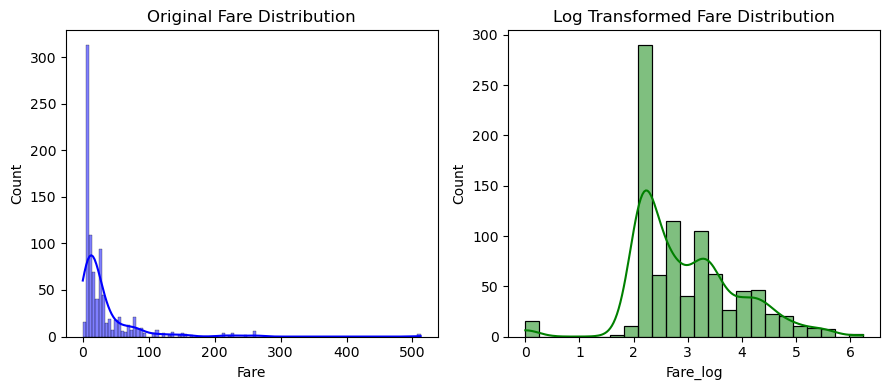

In [65]:
# Plot histogram of original column and log transformed column for comparison
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(train2['Fare'], kde=True, color='blue')
plt.title('Original Fare Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train3['Fare_log'], kde=True, color='green')
plt.title('Log Transformed Fare Distribution')

plt.tight_layout()
plt.show()

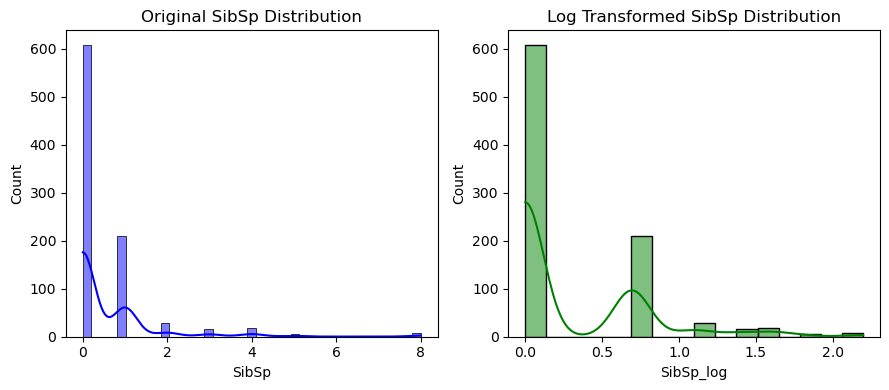

In [66]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(train2['SibSp'], kde=True, color='blue')
plt.title('Original SibSp Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train3['SibSp_log'], kde=True, color='green')
plt.title('Log Transformed SibSp Distribution')

plt.tight_layout()
plt.show()

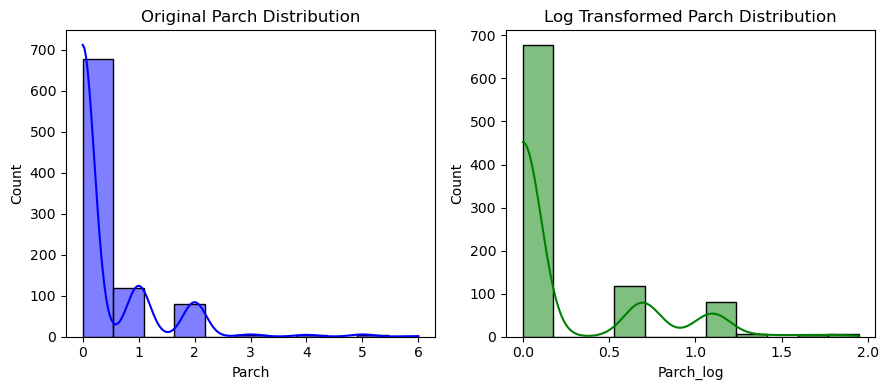

In [67]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(train2['Parch'], kde=True, color='blue')
plt.title('Original Parch Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train3['Parch_log'], kde=True, color='green')
plt.title('Log Transformed Parch Distribution')

plt.tight_layout()
plt.show()

#### On test data

In [68]:
# Create a new DataFrame test3 with the log-transformed column
test3 = test2.copy()

# Apply log transformation to columns with skewed data distribution
cols_to_log = ['Fare', 'SibSp', 'Parch']

for col in cols_to_log:
    test3[f'{col}_log'] = np.log(test3[col] + 1)  # Add 1 to avoid log(0) issues

In [69]:
test3.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_log,SibSp_log,Parch_log
0,3,34.5,0,0,7.8292,1,0,1,0,1,0,2.178064,0.000000,0.000000
1,3,47.0,1,0,7.0000,1,1,0,0,0,1,2.079442,0.693147,0.000000
2,2,62.0,0,0,9.6875,1,0,1,0,1,0,2.369075,0.000000,0.000000
3,3,27.0,0,0,8.6625,1,0,1,0,0,1,2.268252,0.000000,0.000000
4,3,22.0,1,1,12.2875,1,1,0,0,0,1,2.586824,0.693147,0.693147


In [70]:
# Remove the original Fare, SibSp, Parch 
test3 = test3.drop(['Fare', 'SibSp', 'Parch'], axis=1)

In [71]:
test3.head()

,Pclass,Age,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_log,SibSp_log,Parch_log
0,3,34.5,1,0,1,0,1,0,2.178064,0.000000,0.000000
1,3,47.0,1,1,0,0,0,1,2.079442,0.693147,0.000000
2,2,62.0,1,0,1,0,1,0,2.369075,0.000000,0.000000
3,3,27.0,1,0,1,0,0,1,2.268252,0.000000,0.000000
4,3,22.0,1,1,0,0,0,1,2.586824,0.693147,0.693147


#### Comparison before and after feature engineering

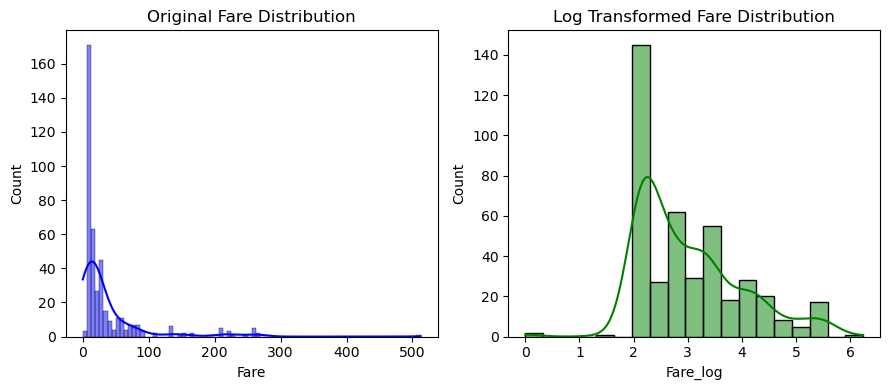

In [72]:
# Plot histogram of original column and log transformed column for comparison
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(test2['Fare'], kde=True, color='blue')
plt.title('Original Fare Distribution')

plt.subplot(1, 2, 2)
sns.histplot(test3['Fare_log'], kde=True, color='green')
plt.title('Log Transformed Fare Distribution')

plt.tight_layout()
plt.show()

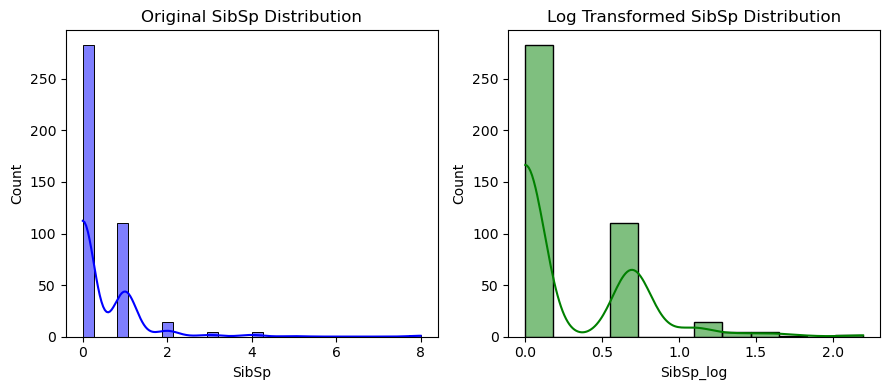

In [73]:
# Plot histogram of original column and log transformed column for comparison
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(test2['SibSp'], kde=True, color='blue')
plt.title('Original SibSp Distribution')

plt.subplot(1, 2, 2)
sns.histplot(test3['SibSp_log'], kde=True, color='green')
plt.title('Log Transformed SibSp Distribution')

plt.tight_layout()
plt.show()

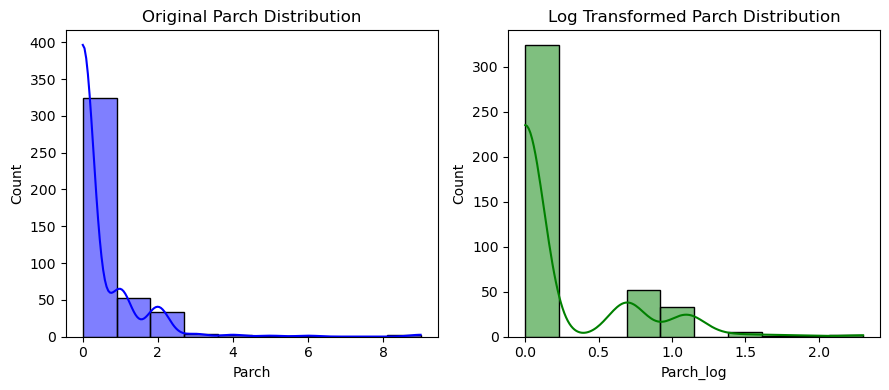

In [74]:
# Plot histogram of original column and log transformed column for comparison
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
sns.histplot(test2['Parch'], kde=True, color='blue')
plt.title('Original Parch Distribution')

plt.subplot(1, 2, 2)
sns.histplot(test3['Parch_log'], kde=True, color='green')
plt.title('Log Transformed Parch Distribution')

plt.tight_layout()
plt.show()

### Training train3 dataset

### Split data

In [75]:
from sklearn.model_selection import train_test_split

X = train3.drop(["Survived"],axis=1).values
y = train3["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Model Training

In [76]:
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

### Model Evaluation and Score

In [77]:
y_pred = logreg.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy score = {:.2f}%".format(score*100))

Accuracy score = 81.01%


### Results: Accuracy scoring does not improve after skewed data applied.

### 5.2 Apply Data Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data, then transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform test data
X_test_scaled = scaler.transform(X_test)


### Model Training, Evaluation and Score

In [79]:
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

score = accuracy_score(y_test, y_pred)
print("Accuracy score = {:.2f}%".format(score*100))

Accuracy score = 81.01%


### Results: Same as Skewed data 

# 6. Hyperparameter Tuning (using train2 and test2 data)

### Split data

In [80]:
from sklearn.model_selection import train_test_split

X = train2.drop(["Survived"],axis=1).values
y = train2["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [81]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


### GridSearchCV on Logistic Regression Model (C, solver, max_iter)

In [82]:
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression

# Create parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers for optimization
    'max_iter': [100, 500, 800],  # Number of iterations for optimization
}

# Get the classifier
logreg_clf = LogisticRegression()

# Grid search
grid_logreg_clf = GridSearchCV(
    estimator = logreg_clf,
    param_grid = param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    n_jobs=4,  # Parallelize computations for speed
    cv=10,  # 10-fold cross-validation
    refit=True,  # Refit with the best parameters
    return_train_score=True
)

# Fit the object to the data
grid_logreg_clf.fit(X_train, y_train)

# Print out the best parameters and score
print("Best Parameters: ", grid_logreg_clf.best_params_)
print(f"Best Score: {grid_logreg_clf.best_score_:.3f}")


Best Parameters:  {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
Best Score: 0.801


## Apply best parameters in Logistic Regression model 

In [83]:
# Create Logistic Regression model with best parameters
logreg_best = LogisticRegression(C=0.1, max_iter=500, solver='lbfgs', random_state=42)

# Train the model
logreg_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_best.predict(X_test)

# Calculate accuracy score
acc_logreg = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc_logreg * 100:.2f}%")



Accuracy score : 81.01%


### Results: No improvement

# 7. Final Model Evaluation and Score

### 7.1 Confusion Matrix and Classification Report

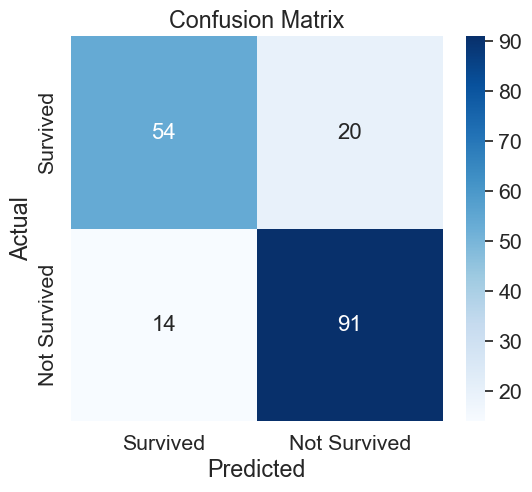

Correlation Coefficient: 0.61

Classification Report:
              precision    recall  f1-score   support

    Survived       0.82      0.87      0.84       105
Not Survived       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [84]:
# Plot Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are defined
class_names = ["Survived", "Not Survived"]

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Create DataFrame visualization
df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.4)  # Adjust label size
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})  # Add values
plt.title("Confusion Matrix")
plt.show()

# Calculate the correlation coefficient
corr_coef = np.corrcoef(y_test, y_pred)[0, 1]  # Correlation coefficient between true and predicted
print(f"Correlation Coefficient: {corr_coef:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

### Results:
### Correlation Coefficient 0.61, meaning moderate positive correlation between the predicted and actual values. The model's predictions align reasonably well with the true outcomes but are not perfect. Room for improvement.
### The overall accuracy of 81% and a balanced macro average indicate the model is reasonably effective.

### 7.2 ROC Curve and AUC Score

AUC: 0.883


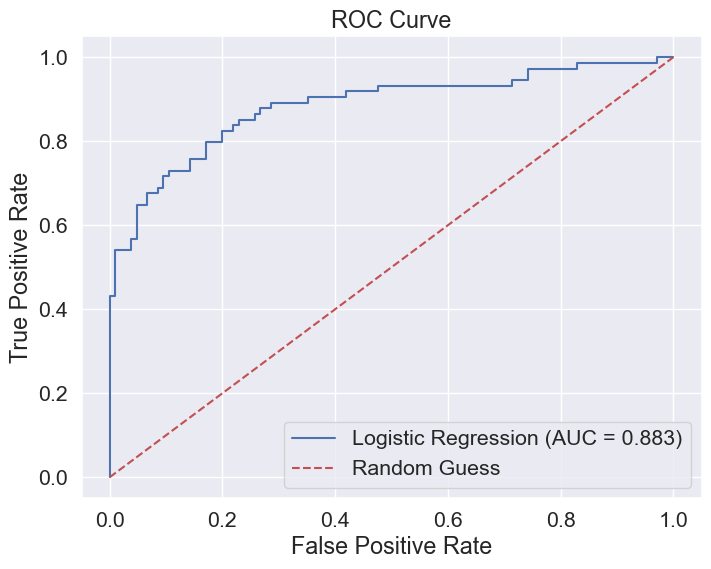

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# Train the model
logreg_best.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = logreg_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


## Results:
## AUC scored 0.883, the model has relatively high ability to distinguish between classes, which is the ability to distinguish between positive and negative classes. Thus, the model performance is considered good fit.

# 8. Submission to Kaggle

In [90]:
# Define target and features
y = train2["Survived"]
X = train2.drop(["Survived"], axis=1)

# Train the Logistic Regression model
logreg_best.fit(X, y)

# Make predictions
predictions = logreg_best.predict(test2) # test2-Titanic test dataset originally from test.csv

# Create output file for Kaggle submission
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("Your Titanic submission csv file was successfully saved!")

Your Titanic submission csv file was successfully saved!


# 9. Analysing predicted results (submission.csv)

### To find out which types of passengers survived the tragedy by the trained Machine Learning Model

In [86]:
# Load the test dataset
test_data = pd.read_csv("test.csv")

# Load the predictions
predictions = pd.read_csv("submission.csv") 

# Merge test data with predictions on PassengerId
merged_data = test_data.merge(predictions, on="PassengerId")

# Filter for predicted survivors (Survived = 1)
survivors = merged_data[merged_data["Survived"] == 1]

# Group by Sex and Pclass to count survivors
summary = survivors.groupby(["Sex", "Pclass"]).size().reset_index(name="Count")

# Calculate the percentage distribution of counts
total_survivors = summary["Count"].sum()
summary["%"] = (summary["Count"] / total_survivors * 100).round(1)

# Sort the summary by the Count column in descending order
summary = summary.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display the summary
print(summary)


      Sex  Pclass  Count     %
0  female       3     60  38.7
1  female       1     50  32.3
2  female       2     29  18.7
3    male       1     16  10.3


In [87]:
survivors

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,1


In [88]:
survivors.shape

(155, 12)

In [89]:
summary

,Sex,Pclass,Count,%
0,female,3,60,38.7
1,female,1,50,32.3
2,female,2,29,18.7
3,male,1,16,10.3


### Note: From the prediction results predicted by the Logistic Regression model and among all the predicted survivors in each group, Female passengers who stayed in Class 3 have had better chance of surviving (38.7%). Male passengers who stayed in Class 1 have had the least chance of surviving (10.3%) among all the predicted survivors.  

# 10. Conclusions

## Model Accuracy:
### The submission to Kaggle achieved an accuracy of approximately 77% on the test dataset. With more time, further improvements could likely be made to enhance this performance.

## Feature Engineering and Hyperparameter Tuning:
### Surprisingly, no significant improvement in accuracy was observed for the Logistic Regression model after applying feature engineering and hyperparameter tuning. There is a need for deeper exploration into feature selection and model optimization strategies.

## Impact of Outliers:
### Experimenting with the removal of outliers in the Fare column resulted in a noticeable drop in model accuracy. This could be attributed to the small dataset size, which became even smaller after outlier removal. Insufficient data can negatively affect the model's ability to generalize. It is worth noting that classification models are generally less sensitive to outliers compared to regression models.

## Future Improvements:
### Several areas could be explored to enhance model performance:

## 1 Feature Engineering
### Investigate feature interactions and correlations further. For instance, the SibSp and Parch variables are highly correlated; dropping one of them and testing the impact could improve the model.

## 2 Hyperparameter Tuning
### Apply GridSearchCV or other hyperparameter optimization techniques to identify better model parameters.

## 3 Model Exploration
### Train and evaluate additional baseline models for comparison. Some models may perform better, especially after hyperparameter tuning.

## 4 Overfitting Mitigation
### Analyze potential overfitting and apply techniques to minimize it, such as regularization.

## 5 Cross-Validation
### Use cross-validation to assess model performance more robustly and ensure better model selection.